In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('bigmart.csv')

In [3]:
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
mean_product_weight = data.groupby('Item_Identifier')['Item_Weight'].transform('mean')
print(mean_product_weight)

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64


In [7]:
data['Item_Weight'].fillna(mean_product_weight,inplace=True)
data['Item_Weight'].isnull().sum()


/var/folders/rd/rm1ghq0950j6l712s6ykcc5w0000gn/T/ipykernel_17486/3213849421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(mean_product_weight,inplace=True)


np.int64(4)

In [8]:

rows_with_missing_values = data[data['Item_Weight'].isnull()]
print(rows_with_missing_values)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
927            FDN52          NaN          Regular         0.130933   
1922           FDK57          NaN          Low Fat         0.079904   
4187           FDE52          NaN          Regular         0.029742   
5022           FDQ60          NaN          Regular         0.191501   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
927   Frozen Foods   86.9198            OUT027                       1985   
1922   Snack Foods  120.0440            OUT027                       1985   
4187         Dairy   88.9514            OUT027                       1985   
5022  Baking Goods  121.2098            OUT019                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
927       Medium               Tier 3  Supermarket Type3          1569.9564  
1922      Medium               Tier 3  Supermarket Type3          4434.2280  
4187      Medium        

In [9]:

mean_product_weight = data.groupby('Item_Type')['Item_Weight'].transform('mean')

data['Item_Weight'] = data['Item_Weight'].fillna(mean_product_weight)

data['Item_Weight'].isnull().sum()

np.int64(0)

In [10]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [11]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'reg': 'Regular',
    'low fat': 'Low Fat'
})

In [12]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [13]:
# Group by Outlet_Type and Outlet_Size to see the distribution
outlet_type_size = data.groupby(['Outlet_Type', 'Outlet_Size']).size().reset_index(name='Count')

print(outlet_type_size)


         Outlet_Type Outlet_Size  Count
0      Grocery Store       Small    528
1  Supermarket Type1        High    932
2  Supermarket Type1      Medium    930
3  Supermarket Type1       Small   1860
4  Supermarket Type2      Medium    928
5  Supermarket Type3      Medium    935


In [14]:



for i in range(len(data)):
    if data.loc[i, 'Outlet_Type'] == 'Grocery Store':
        data.loc[i, 'Outlet_Size'] = 'Small'


data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [15]:

for i in range(len(data)):
    if data.loc[i, 'Outlet_Location_Type'] == 'Tier 2' :
        data.loc[i, 'Outlet_Size'] = 'Small'


data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [16]:
outlet_type_size = data.groupby(['Outlet_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Identifier']).size().reset_index(name='Count')

print(outlet_type_size)

         Outlet_Type Outlet_Size Outlet_Location_Type Outlet_Identifier  Count
0      Grocery Store       Small               Tier 1            OUT019    528
1      Grocery Store       Small               Tier 3            OUT010    555
2  Supermarket Type1        High               Tier 3            OUT013    932
3  Supermarket Type1      Medium               Tier 1            OUT049    930
4  Supermarket Type1       Small               Tier 1            OUT046    930
5  Supermarket Type1       Small               Tier 2            OUT017    926
6  Supermarket Type1       Small               Tier 2            OUT035    930
7  Supermarket Type1       Small               Tier 2            OUT045    929
8  Supermarket Type2      Medium               Tier 3            OUT018    928
9  Supermarket Type3      Medium               Tier 3            OUT027    935


In [17]:
OS_sum = data['Item_Outlet_Sales'].sum()
OS_outliers = data[data['Item_Outlet_Sales'] > 10000]["Item_Outlet_Sales"].sum()

print("Total Sum:", OS_sum)
print("Outliers:",OS_outliers)

print("After Removing:", OS_sum - OS_outliers)

Total Sum: 18591125.4104
Outliers: 88516.11260000001
After Removing: 18502609.2978


In [18]:
outliers = data[data['Item_Outlet_Sales']>9500 ]

outliers

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1009,FDU14,17.750,Low Fat,0.034584,Dairy,248.3750,OUT027,1985,Medium,Tier 3,Supermarket Type3,10236.6750
1450,FDZ20,16.100,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4289,NCM05,6.825,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362
4349,FDP33,18.700,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
4888,FDF39,14.850,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
4961,FDK03,12.600,Regular,0.074339,Dairy,255.5356,OUT017,2007,Small,Tier 2,Supermarket Type1,9664.7528
5223,FDQ19,7.350,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
5500,FDG32,19.850,Low Fat,0.175143,Fruits and Vegetables,222.3772,OUT027,1985,Medium,Tier 3,Supermarket Type3,9562.2196
6541,FDI50,8.420,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
6606,DRF36,16.100,Low Fat,0.023463,Soft Drinks,190.6846,OUT027,1985,Medium,Tier 3,Supermarket Type3,9554.2300


In [19]:
outliers = data[data['Item_Outlet_Sales'] > 10000]

outliers

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1009,FDU14,17.75,Low Fat,0.034584,Dairy,248.3750,OUT027,1985,Medium,Tier 3,Supermarket Type3,10236.6750
1450,FDZ20,16.10,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,18.70,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
4888,FDF39,14.85,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
5223,FDQ19,7.35,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
6541,FDI50,8.42,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
7188,NCE42,21.10,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
7191,NCH18,9.30,Low Fat,0.044445,Household,245.2802,OUT027,1985,Medium,Tier 3,Supermarket Type3,10072.8882


In [35]:
num_features = data.select_dtypes(include=[np.number])
num_features.dtypes


Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [36]:
corr=num_features.corr()
corr


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009215,0.025967,-0.013417,0.013198
Item_Visibility,-0.009215,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025967,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.013417,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013198,-0.128625,0.567574,-0.049135,1.000000


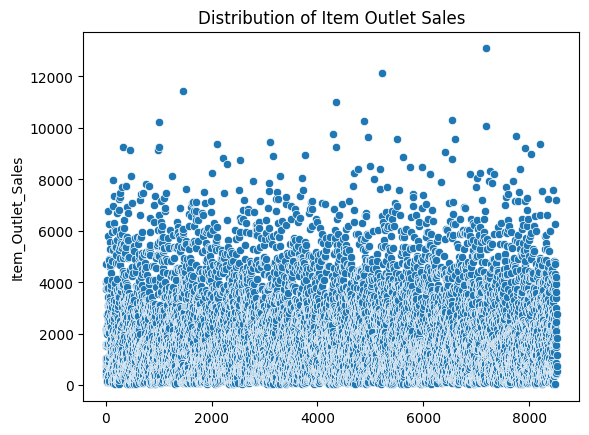

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data['Item_Outlet_Sales'])
plt.title('Distribution of Item Outlet Sales')
plt.show()


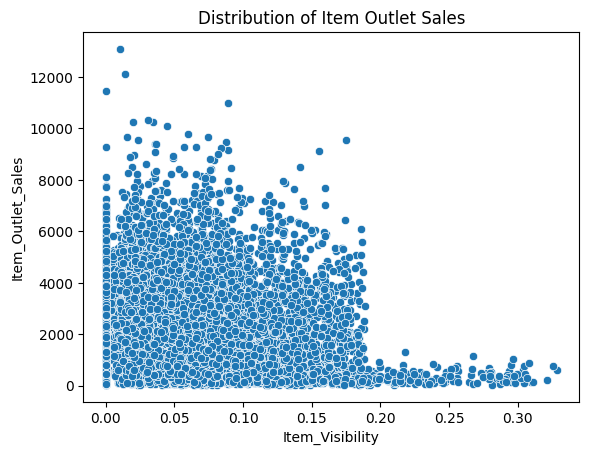

In [21]:
sns.scatterplot(x=data['Item_Visibility'],y=data['Item_Outlet_Sales'])
plt.title('Distribution of Item Outlet Sales')
plt.show()

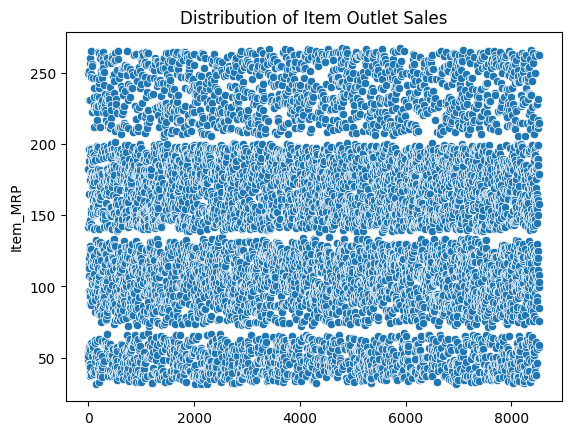

In [22]:
sns.scatterplot(data['Item_MRP'])
plt.title('Distribution of Item Outlet Sales')
plt.show()

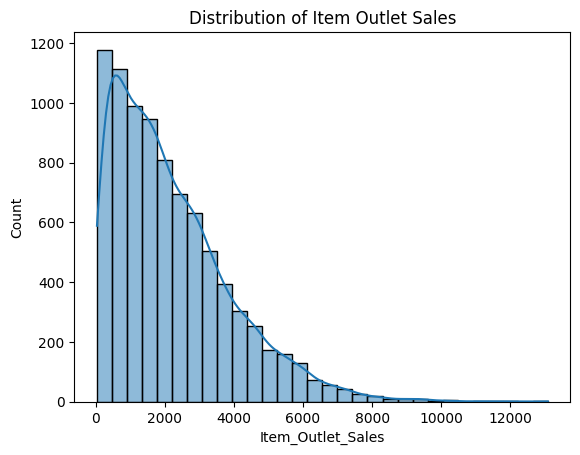

In [23]:
sns.histplot(data['Item_Outlet_Sales'], kde=True, bins=30)
plt.title('Distribution of Item Outlet Sales')
plt.show()

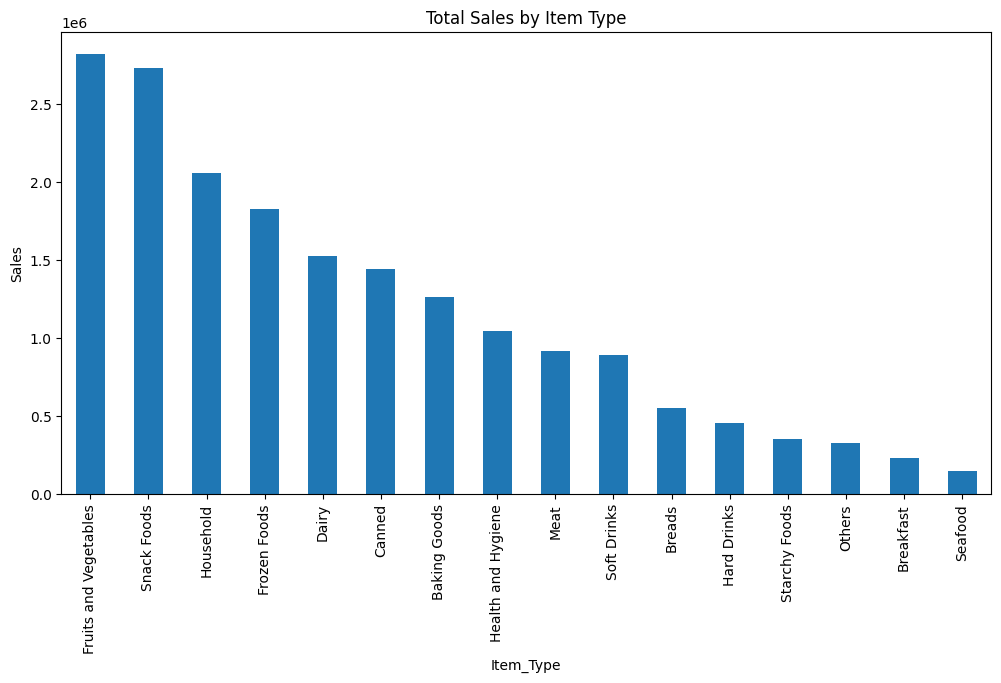

In [24]:
sales_by_item = data.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
sales_by_item.plot(kind='bar', figsize=(12, 6), title='Total Sales by Item Type')
plt.ylabel('Sales')
plt.show()


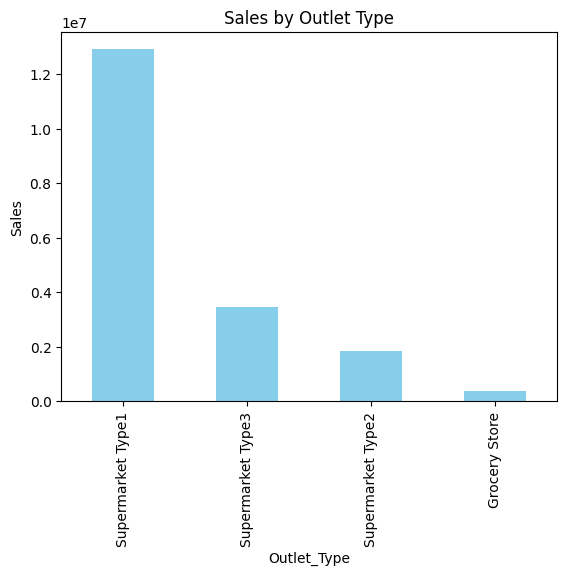

In [25]:
sales_by_outlet = data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
sales_by_outlet.plot(kind='bar', title='Sales by Outlet Type', color='skyblue')
plt.ylabel('Sales')
plt.show()


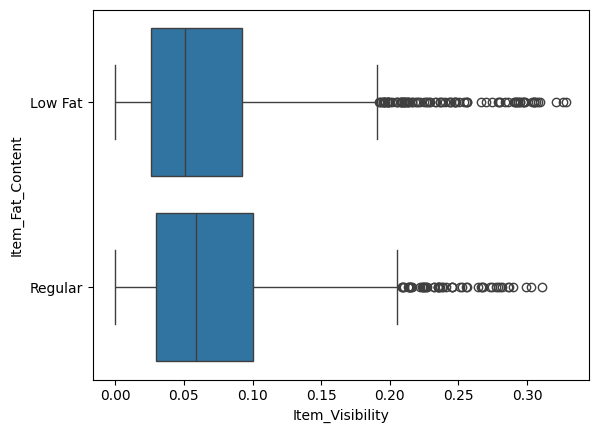

In [26]:
sns.boxplot(x = data['Item_Visibility'], y = data['Item_Fat_Content'])
plt.show()

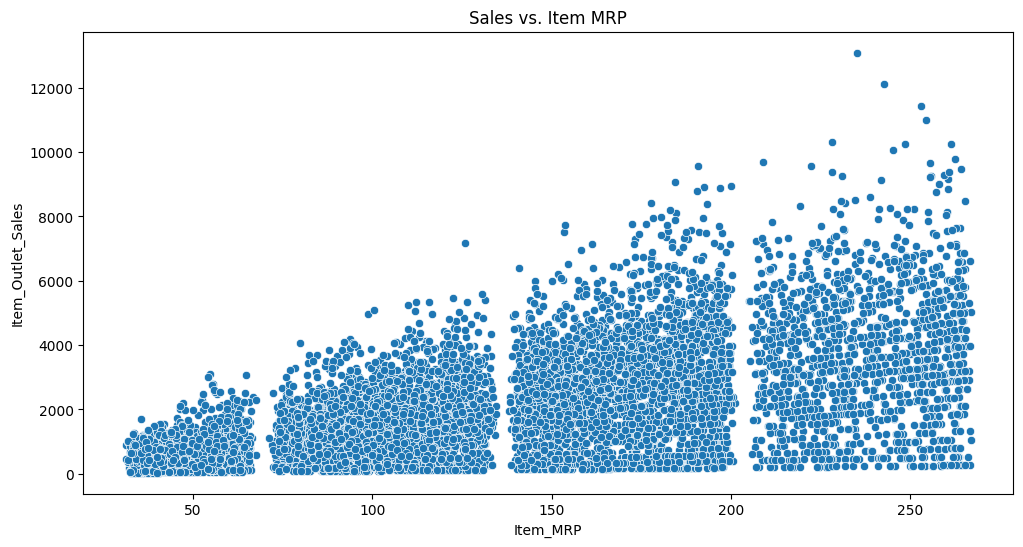

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Item_MRP', y='Item_Outlet_Sales')
plt.title('Sales vs. Item MRP')
plt.show()

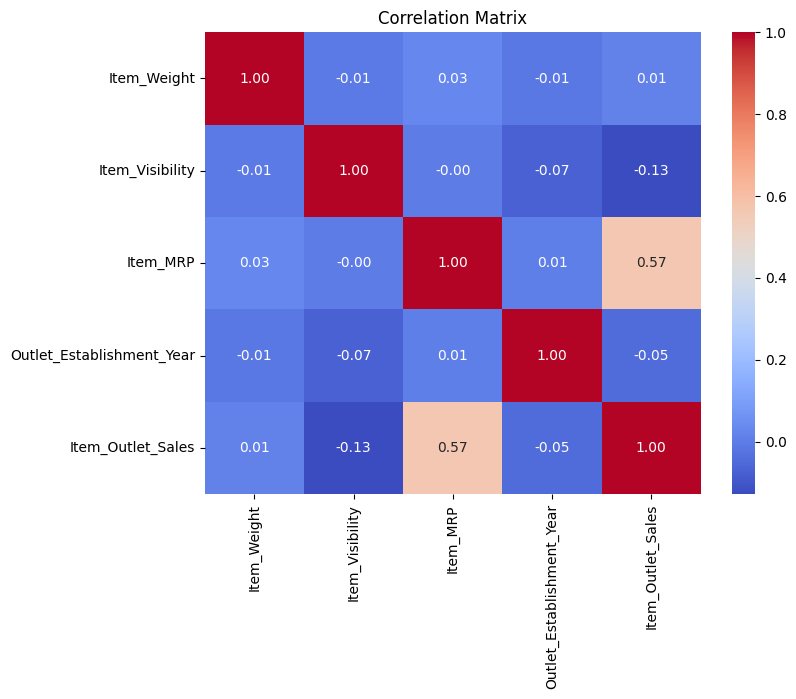

In [28]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

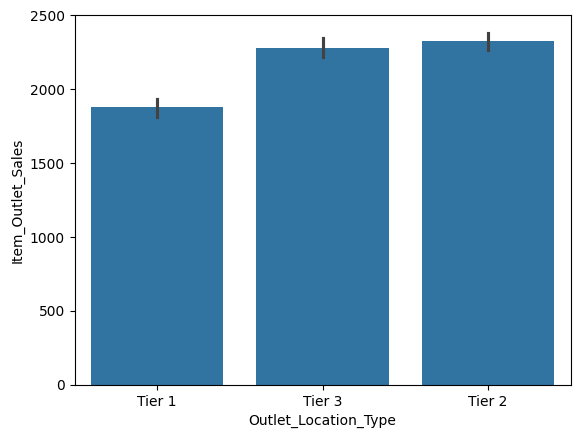

In [30]:
sns.barplot(data = data, x='Outlet_Location_Type', y='Item_Outlet_Sales')

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

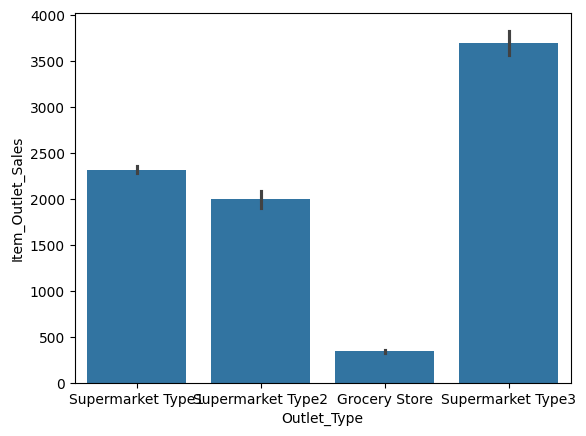

In [31]:
sns.barplot(data = data, x='Outlet_Type', y='Item_Outlet_Sales')

<Axes: xlabel='Item_Visibility', ylabel='Item_MRP'>

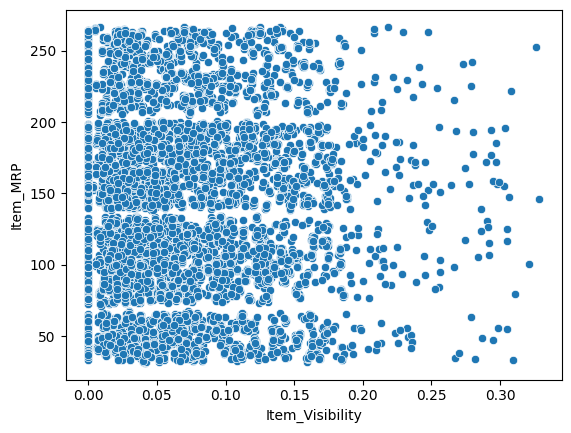

In [32]:
sns.scatterplot(data = data , x='Item_Visibility', y = 'Item_MRP')